# EDA

In [1]:
import os
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import networkx as nx
# import snap

In [2]:
Events = [
    "ebola-essien-all-rnr-threads",
    "charliehebdo-all-rnr-threads",
    "ferguson-all-rnr-threads",
    "germanwings-crash-all-rnr-threads",
    "gurlitt-all-rnr-threads",
    "ottawashooting-all-rnr-threads",
    "prince-toronto-all-rnr-threads",
    "putinmissing-all-rnr-threads",
    "sydneysiege-all-rnr-threads"
]

directory = "./combined_data"

### Number of Rumour Thread v.s. Number of Non-Rumour Thread

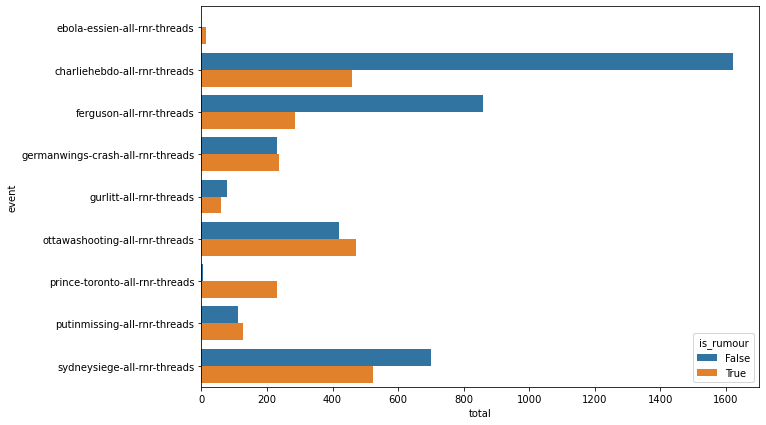

In [49]:
plot_data = pd.DataFrame()

for event in Events:
    input_file = os.path.join(directory, event, "source_tweets", "combined.csv")
    df = pd.read_csv(input_file)
    df = df[['id', 'event', 'is_rumour']].groupby(['event', 'is_rumour']).count().rename(columns={"id": "total"}).reset_index()
    if False not in set(df['is_rumour']):
        add_row = {"event": event, 'is_rumour': False, "total": 0}
        df = df.append(add_row, ignore_index=True)
    if True not in set(df['is_rumour']):
        add_row = {"event": event, 'is_rumour': True, "total": 0}
        df = df.append(add_row, ignore_index=True)
    plot_data = plot_data.append(df, ignore_index=True)

plt.figure(figsize=(10,7))
ax = sns.barplot(data=plot_data, x="total", y="event", hue="is_rumour")

### Number of Retweets of Source Tweet In Rumour and Non-Rumour Thread Among Time

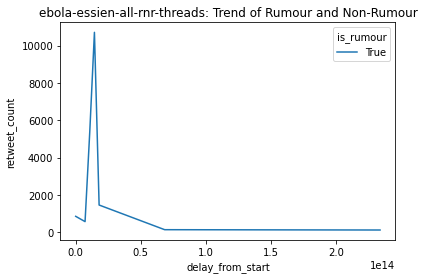

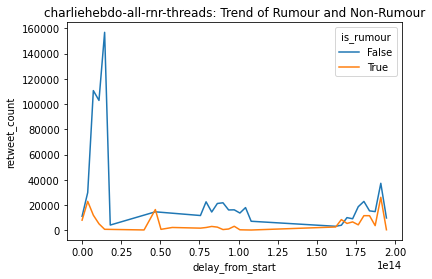

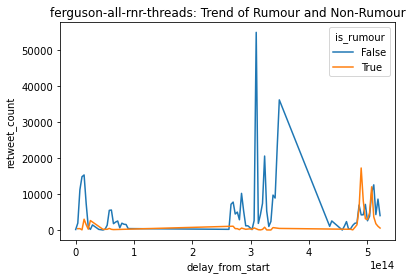

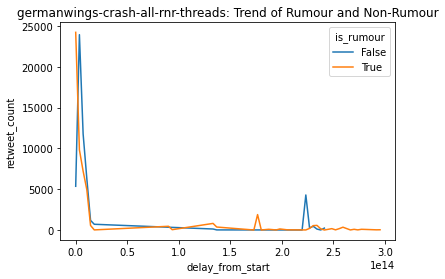

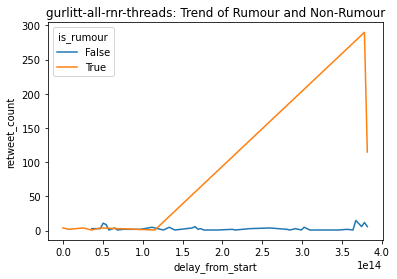

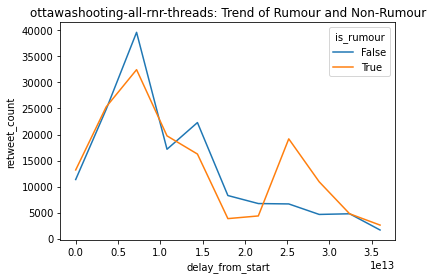

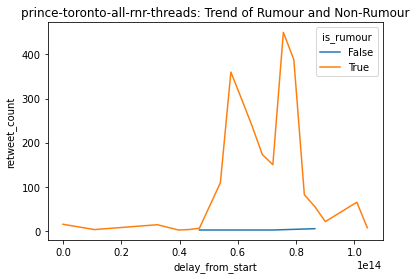

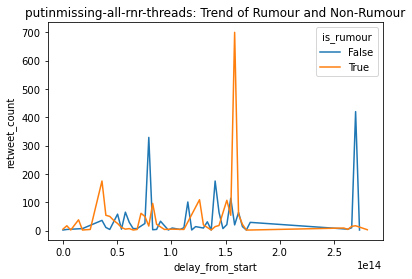

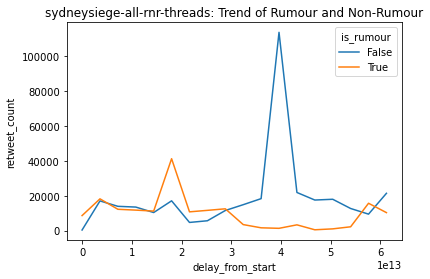

In [98]:
for event in Events:
    input_file = os.path.join(directory, event, "source_tweets", "combined.csv")
    df = pd.read_csv(input_file)
    df = df[['id','is_rumour','retweet_count', 'created_at']]
    
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y"))
    event_start = df['date'].min()
    df['delay_from_start'] = df['date'].apply(lambda x: (x - event_start))
    df['delay_from_start'] = df['delay_from_start'].dt.round("H")

    df = df[['is_rumour','retweet_count','delay_from_start']].groupby(['is_rumour', 'delay_from_start']).sum().reset_index()

    plt.title(event + ": Trend of Rumour and Non-Rumour")
    sns.lineplot(data=df, x="delay_from_start", y='retweet_count', hue='is_rumour')
    plt.show()

### Depth of Reaction Structures

In [3]:
def depth(x):
    if type(x) is dict and x:
        return 1 + max(depth(x[a]) for a in x)
    if type(x) is list and x:
        return 1 + max(depth(a) for a in x)
    return 0

all_in_one = pd.DataFrame()

for event in Events:
    input_file = os.path.join(directory, event, "source_tweets", "combined.csv")
    df = pd.read_csv(input_file)
    df = df[['id', 'event', 'is_rumour', 'structure']]
    # clean ” and '
    df['structure'] = df['structure'].apply(lambda x: x.replace('”', '\"'))
    df['structure'] = df['structure'].apply(lambda x: x.replace('\'', '\"'))
    df['structure'] = df['structure'].apply(lambda x: literal_eval(x))
    df['depth'] = df['structure'].apply(lambda x: depth(x))

    df = df[['event', 'is_rumour','depth','structure']]
    all_in_one = all_in_one.append(df)

all_in_one[['event', 'is_rumour', 'depth']].groupby(['event', 'is_rumour']).describe()

depth                           \
                                              count      mean       std  min   
event                             is_rumour                                    
charliehebdo-all-rnr-threads      False      1621.0  4.887107  4.118637  1.0   
                                  True        458.0  3.995633  3.254349  1.0   
ebola-essien-all-rnr-threads      True         14.0  4.071429  1.639150  2.0   
ferguson-all-rnr-threads          False       859.0  4.440047  4.120796  1.0   
                                  True        284.0  5.049296  5.414060  1.0   
germanwings-crash-all-rnr-threads False       231.0  2.904762  2.182843  1.0   
                                  True        238.0  3.399160  3.094217  1.0   
gurlitt-all-rnr-threads           False        77.0  1.181818  0.884475  1.0   
                                  True         61.0  1.180328  0.500273  1.0   
ottawashooting-all-rnr-threads    False       420.0  3.750000  2.860625  1.0   
                                  True        470.0  3.723404  2.709079  1.0   
prince-toronto-all-rnr-threads    False         4.0  1.500000  0.577350  1.0   
                                  True        229.0  2.240175  1.823086  1.0   
putinmissing-all-rnr-threads      False       112.0  1.919643  1.483473  1.0   
                                  True        126.0  2.182540  1.561542  1.0   
sydneysiege-all-rnr-threads       False       699.0  5.278970  4.462290  1.0   
                                  True        522.0  4.394636  3.409005  1.0   

                                                                  
                                             25%  50%  75%   max  
event                             is_rumour                       
charliehebdo-all-rnr-threads      False      2.0  3.0  6.0  23.0  
                                  True       2.0  3.0  4.0  20.0  
ebola-essien-all-rnr-threads      True       3.0  4.0  5.0   8.0  
ferguson-all-rnr-threads          False      2.0  3.0  5.0  34.0  
                                  True       2.0  4.0  6.0  48.0  
germanwings-crash-all-rnr-threads False      2.0  2.0  3.0  14.0  
                                  True       2.0  2.0  4.0  20.0  
gurlitt-all-rnr-threads           False      1.0  1.0  1.0   8.0  
                                  True       1.0  1.0  1.0   4.0  
ottawashooting-all-rnr-threads    False      2.0  3.0  4.0  20.0  
                                  True       2.0  3.0  4.0  19.0  
prince-toronto-all-rnr-threads    False      1.0  1.5  2.0   2.0  
                                  True       1.0  2.0  3.0  16.0  
putinmissing-all-rnr-threads      False      1.0  2.0  2.0  13.0  
                                  True       1.0  2.0  3.0  10.0  
sydneysiege-all-rnr-threads       False      2.0  4.0  6.0  20.0  
                                  True       2.0  3.0  5.0  20.0

### Graph Representation of Network Structures in Rumor and Non-Rumor Threads

ebola-essien-all-rnr-threads


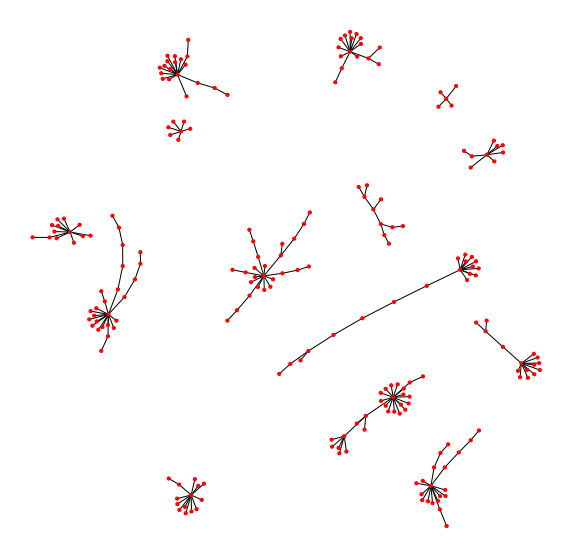

germanwings-crash-all-rnr-threads


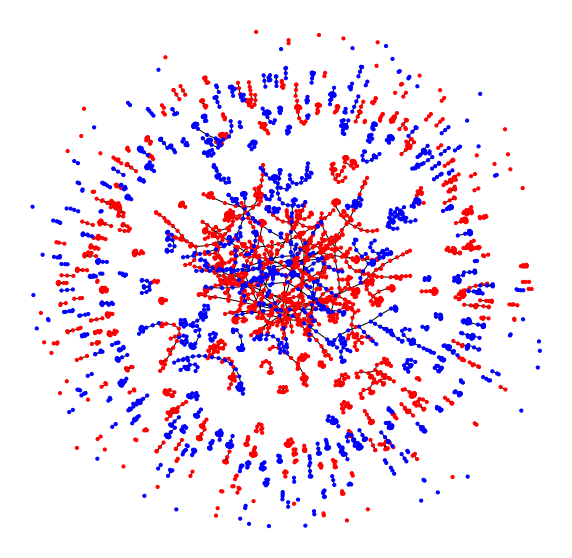

gurlitt-all-rnr-threads


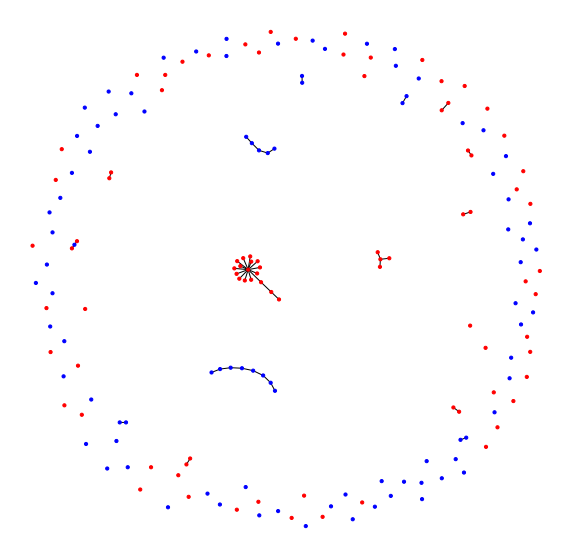

prince-toronto-all-rnr-threads


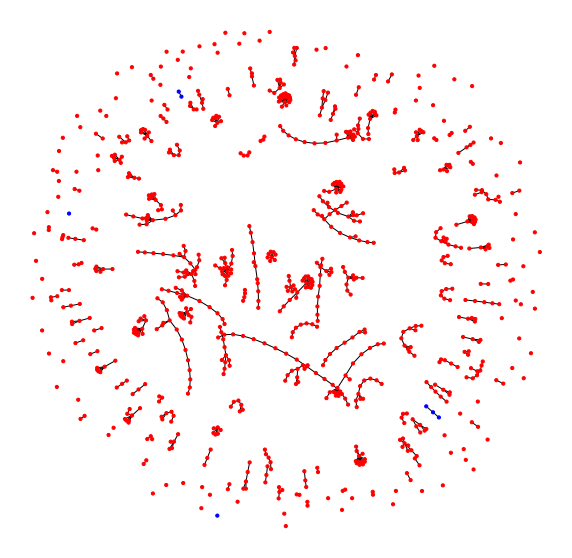

putinmissing-all-rnr-threads


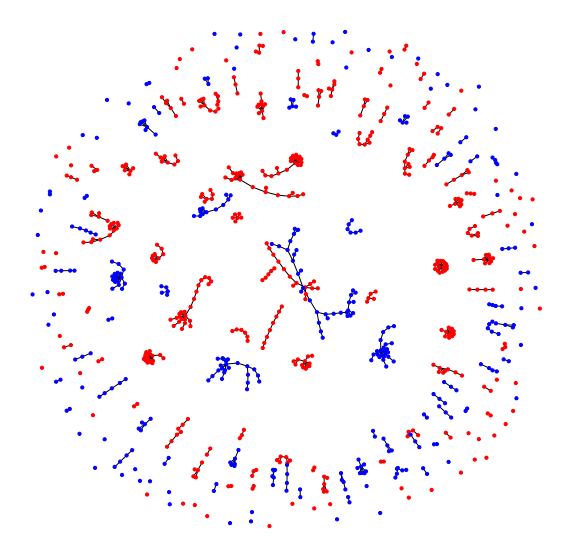

In [8]:
objects = [
    "ebola-essien-all-rnr-threads",
    # "charliehebdo-all-rnr-threads",
    # "ferguson-all-rnr-threads",
    "germanwings-crash-all-rnr-threads",
    "gurlitt-all-rnr-threads",
    # "ottawashooting-all-rnr-threads",
    "prince-toronto-all-rnr-threads",
    "putinmissing-all-rnr-threads",
    # "sydneysiege-all-rnr-threads"
]

def make_tree(G, parent, x, is_rumour):
    if type(x) is dict and x:
        keysList = list(x.keys())
        for key in keysList:
            i = int(key)
            # add node if not exist
            if not G.has_node(i):
                G.add_node(i, is_rumour = is_rumour)
            # add edge between this and parent, if parent exists
            if parent:
                G.add_edge(i, parent)
            # go deeper
            make_tree(G, i, x[key], is_rumour)
    return


for event in objects:
    G1 = nx.Graph()

    input_file = os.path.join(directory, event, "source_tweets", "combined.csv")
    df = pd.read_csv(input_file)
    df = df[['id', 'event', 'is_rumour', 'structure']]
    df['structure'] = df['structure'].apply(lambda x: x.replace('”', '\"'))
    df['structure'] = df['structure'].apply(lambda x: x.replace('\'', '\"'))
    df['structure'] = df['structure'].apply(lambda x: literal_eval(x))

    df.apply(lambda x: make_tree(G1, None, x['structure'], x['is_rumour']), axis=1)

    colorPal = {"rumour": "red", "nonrumour": "blue"}
    rumor_to_color = lambda rumor : (colorPal['rumour'] if rumor == True else colorPal['nonrumour'])
    node_colors = [rumor_to_color(G1.nodes[node]['is_rumour']) for node in list(G1.nodes())]

    pos = nx.layout.spring_layout(G1)

    print(event)
    plt.figure(figsize=(10,10))
    nodes = nx.draw_networkx_nodes(G1, pos,
                               node_color=node_colors,
                               node_size=10)
    edges = nx.draw_networkx_edges(G1, pos,
                                width=1)
    
    ax = plt.gca()
    ax.set_axis_off()

    plt.show()